In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text

import highlight_text

In [17]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [18]:
myfont = {'fontname':'DejaVu Sans'}

In [19]:
#set default colors
text_color = 'white'
background = '#313332'

In [20]:
df2 = pd.read_csv('beeswarm2.csv')

In [21]:
#do some data preprocessing and cleaning

#split the player names
df2['Player'] = df2['Player'].str.split('\\',expand=True)[0] # split names and take the first section
df2 = df2[df2['Pos'] != 'GK'] #remove goalkeepers
df2 = df2[df2['90s'] > 6.5].reset_index(drop=True) # filter out players with less than 6.5 full 90s

In [22]:
#make the per 90 stats and replace the original data
#metrics = ['Prog90','1/390','xA90','Cmp%','KP90','PPA90'] #create a list of columns you want to use later in plotting

df2['Prog'] = df2['Prog'] / df2['90s']
df2['1/3'] = df2['1/3'] / df2['90s']
df2['xA'] = df2['xA'] / df2['90s']
df2['KP'] = df2['KP'] / df2['90s']
df2['PPA'] = df2['PPA'] / df2['90s']

In [23]:
#print(df2.head())
df2.Player.unique(); #get a list of all unique player names

In [24]:
#create a list of 6 metrics to compare
metrics = ['Prog','1/3','xA','Cmp%','KP','PPA']

Text(0.55, 0.03, '@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored')

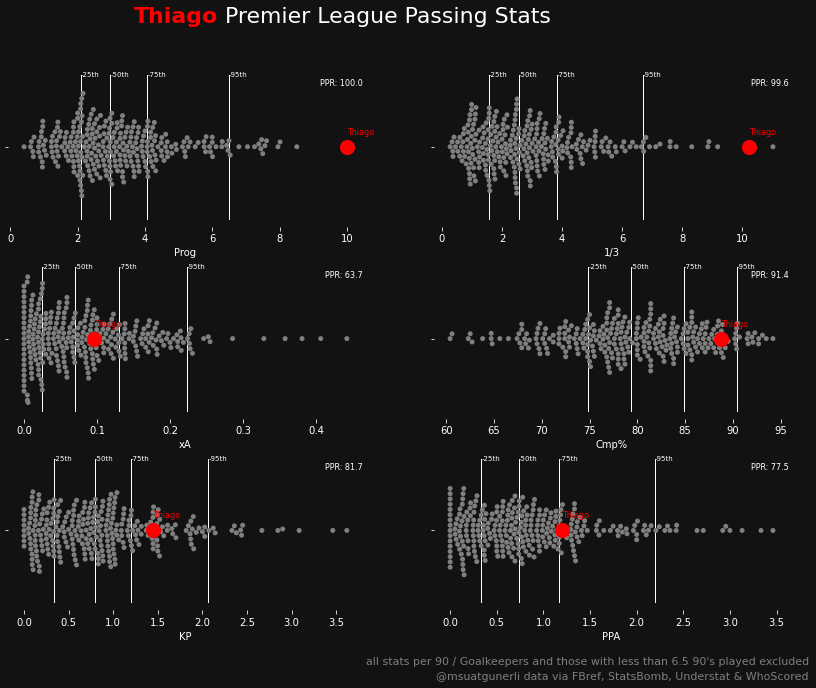

In [25]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor('#121212')
#ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons, create counters to loop over
counter=0
counter2=0 #these two counters will specify which subplot to print in
met_counter = 0 #count over the metrics list to plot the next one

for i,ax in zip(df2['Player'],axes.flatten()): #loop over the player column, zipim amacı ne?, 2D arrayi 1D'ye flatten et ki loop over yapabilesin
    ax.set_facecolor('#121212')
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=2)

    spines = ['top','bottom','left','right']
    #spines = ['right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)

    sns.swarmplot(x=metrics[met_counter],data=df2,ax=axes[counter,counter2],zorder=2,color='#7F7F7F') #pass in the metrics and the met_counter

    per_25 = np.percentile(df2[metrics[met_counter]],25)
    #ax.axvline(x=per_25, color='white',zorder=1)
    ax.axvline(x=per_25, ymin=0.05, ymax=0.95, color='white',zorder=1,linewidth=1) #adjust height of vline the order can be changed to 3 to make it more visible
    ax.text(s='-25th',x=per_25,y=-0.4394,c='white', size=7) #veya -0.4633

    per_50 = np.percentile(df2[metrics[met_counter]],50)
    ax.axvline(x=per_50,ymin=0.05, ymax=0.95,color='white',zorder=1, linewidth=1)
    ax.text(s='-50th',x=per_50,y=-0.4394,c='white',size=7)

    per_75 = np.percentile(df2[metrics[met_counter]],75)
    ax.axvline(x=per_75,ymin=0.05, ymax=0.95,color='white',zorder=1,linewidth=1)
    ax.text(s='-75th',x=per_75,y=-0.4394,c='white',size=7)

    per_95 = np.percentile(df2[metrics[met_counter]],95)
    ax.axvline(x=per_95,ymin=0.05, ymax=0.95,color='white',zorder=1,linewidth=1)
    ax.text(s='-95th',x=per_95,y=-0.4394,c='white',size=7)

    ax.set_xlabel(f'{metrics[met_counter]}',c='white')      #fstring for axis labels

    for x in range(len(df2['Player'])):
        if df2['Player'][x] == 'Thiago Alcántara':
            ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='red',zorder=3)
            ax.text(s='Thiago',x=df2[metrics[met_counter]][x],y=-.08,c='red',size=8)
            
            per_player = sp.stats.percentileofscore(df2[metrics[met_counter]],df2[metrics[met_counter]][x])
            text(1, 0.9,'PPR: '+ str(round(per_player,1)), ha='right', va='center', color='white', transform=ax.transAxes, size=8)
            #text(1, 0.9,'PPR: '+ str(round((100-round(per_player,1)),1), ha='left', va='center', color='white', transform=ax.transAxes, size=7)

        #if df2['Player'][x] == 'İlkay Gündoğan':
            #ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='#6CABDD',zorder=3)
            #ax.text(s='Gündoğan',x=df2[metrics[met_counter]][x],y=-.08,c='#6CABDD',size=8)

    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue #break out of the current iteration and go to the top, yoksa bire set edip tekrar sıfıra dönecekti
    if counter2 == 1:
        counter2 = 0
        counter+=1

s='<Thiago> Premier League Passing Stats'
highlight_text.fig_text(s=s,
                x=.25, y=.95,
                highlight_weights = ['bold'],
                **myfont,
                fontsize=22,
                #fontfamily = 'Andale Mono',
                color = text_color,
                highlight_colors = ['red'], #oyuncu adı rengi buraya
                va='center',
                zorder=3
               )

fig.text(.48,.05,"all stats per 90 / Goalkeepers and those with less than 6.5 90's played excluded",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')
fig.text(.55,.03,"@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')

#plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)



In [26]:
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')